## 1.计算机内存的基本单元   
* 计算机的内存是以一个字节作为一个索引单位，一个字节有8个位。 
* 内存中一个字节，对应一个地址

计算机的存储都是以二进制形式。    
* 比如一个char(可以理解成字符串中的一个字符)，占一个字节。    
* 比如整形Int 占四个字节。整型数字1，则为00000000 00000000 00000000 00000001，在内存中占用四个索引单位。

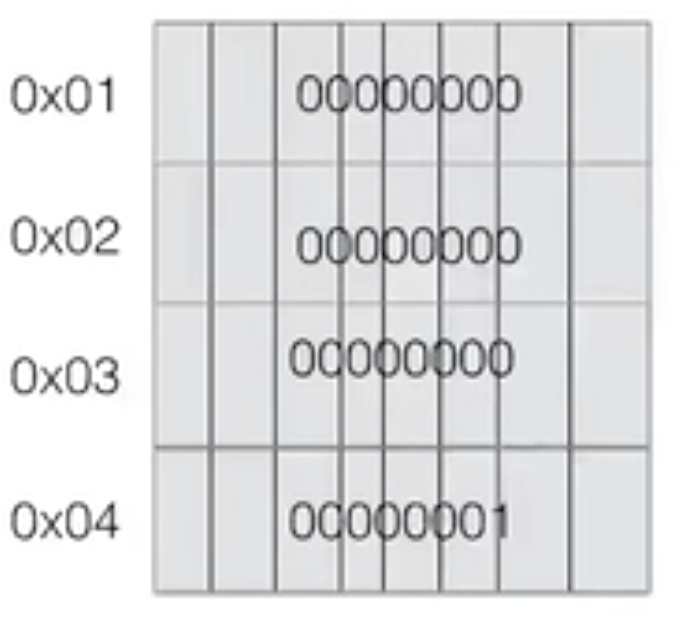

## 2.顺序表的形式

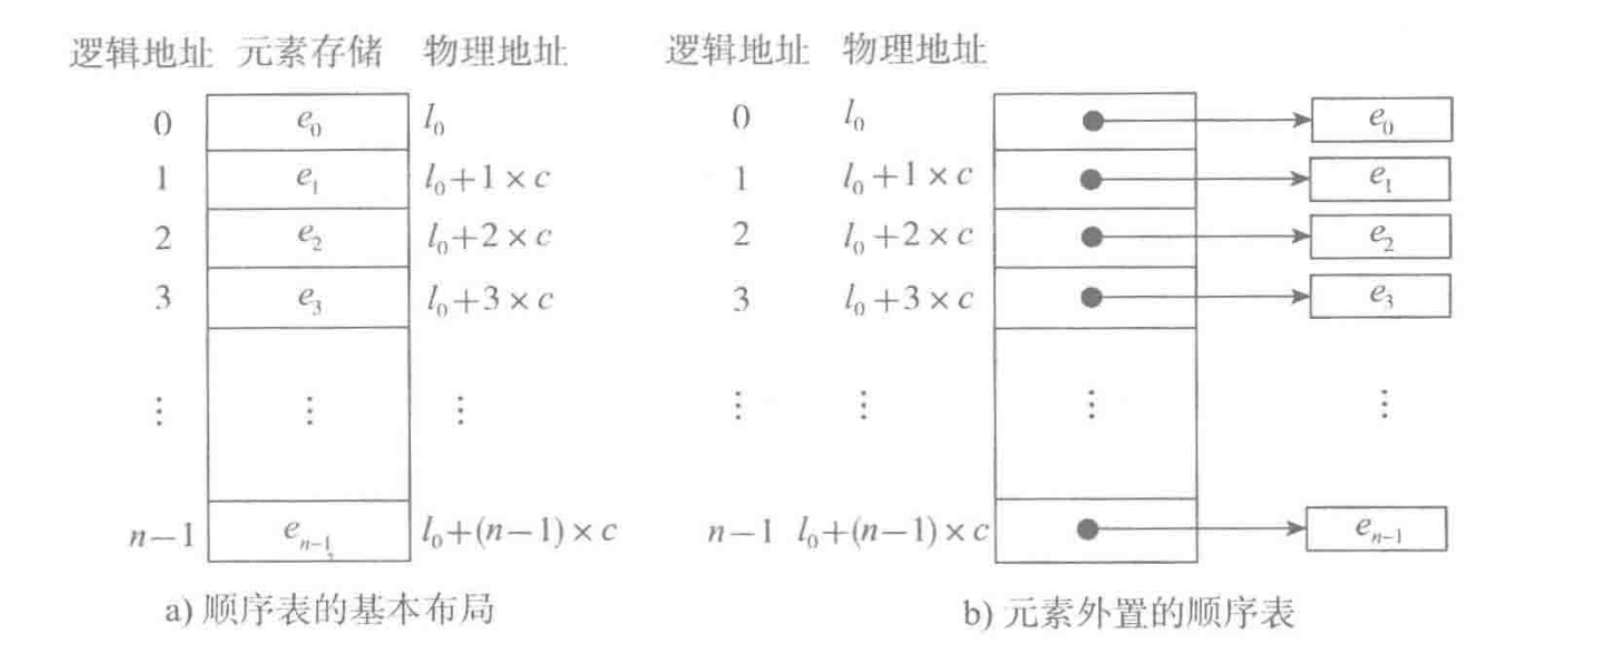

#### （1）顺序表的基本形式
图a表示的是顺序表的基本形式，每个元素所占的存储单元大小固定相同，元素的下标是其逻辑地址，而元素存储的物理地址（实际内存地址）可以通过存储区的起始地址Loc (e0)加上逻辑地址（第i个元素）与存储单元大小（c）的乘积计算而得，即：

Loc(ei) = Loc(e0) + c*i

索引，访问指定元素时无需从头遍历，通过计算便可获得对应地址，其时间复杂度为O(1)。

#### （2）顺序表的外置形式

图b是顺序表的元素外置的形式，每一个元素可以是不同的类型，大小可以不一。   
元素外置形式是将实际数据元素另行存储，而顺序表中各单元位置保存对应元素的地址信息（即链接）。     
由于存储的是地址，所以每个链接所需的存储量相同，通过上述公式，可以计算出元素链接的存储位置，而后顺着链接找到实际存储的数据元素。注意，图b中的c不再是数据元素的大小，而是存储一个链接地址所需的存储量，这个量通常很小。

图b这样的顺序表也被称为对实际数据的索引，这是最简单的索引结构。

## 3.顺序表的结构与实现

#### (1) 顺序表的结构

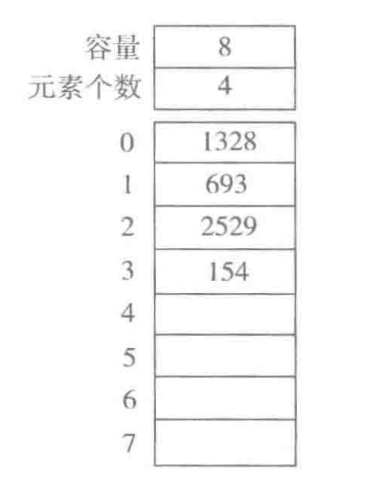

一个顺序表的完整信息一般包括两部分：数据信息和表头信息。表头信息一般包括列表的总容量（一开始就要估计好表的长度）和已经有的元素个数。

#### （2）顺序表的两种基本实现方式 
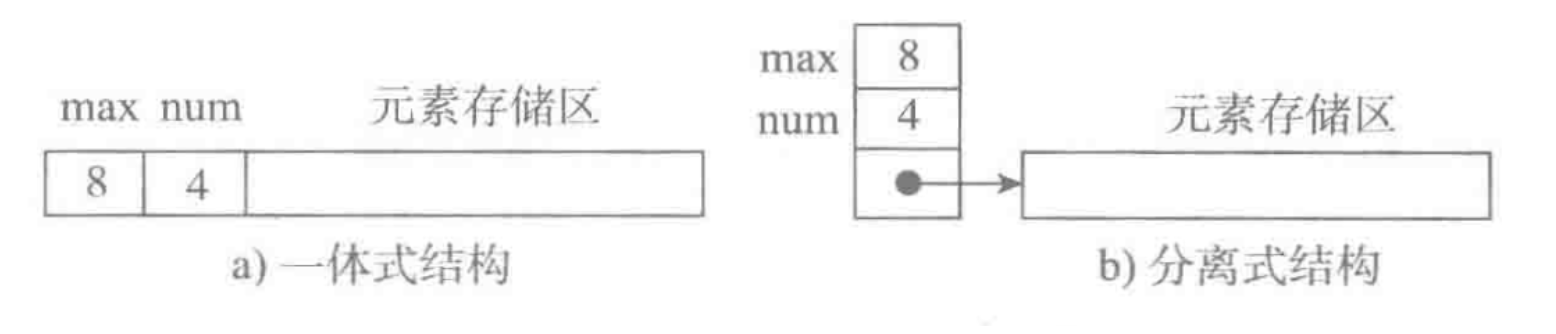

图a为一体式结构，存储表表头信息与数据信息以连续的方式安排在一块存储区里，形成一个完整的顺序表对象。

图b为分离式结构，表对象里只保存表头信息（即容量和元素个数），实际数据元素存放在另一个独立的元素存储区里。表头信息通过加一个表对象地址信息，通过链接与基本表对象关联。

#### （3）元素存储区替换

* 一体式结构由于顺序表信息区与数据区连续存储在一起，所以若想更换数据区，则只能整体搬迁，即整个顺序表对象（包括两个区域）改变了。

* 分离式结构若想更换数据区，只需将表信息区中的数据区链接地址更新即可，而该顺序表对象不变。

#### （4）元素存储区扩充

采用分离式结构的顺序表，只需将表信息区中的数据区链接地址更新到更大存储区的地址即可，所有使用这个表的地方都不必修改。    
人们把采用这种技术实现的顺序表称为动态顺序表，因为其容量可以在使用中动态变化。

扩充的两种策略：
* 固定数目的扩充

每次扩充增加固定数目的存储位置，如每次扩充增加10个元素位置，这种策略可称为线性增长。

特点：节省空间，但是扩充操作频繁，操作次数多。
* 每次的加倍扩充

每次扩充容量加倍，如每次扩充增加一倍存储空间。

特点：减少了扩充操作的执行次数，但可能会浪费空间资源。以空间换时间，推荐的方式。

## 3.顺序表的操作
#### （1）添加  
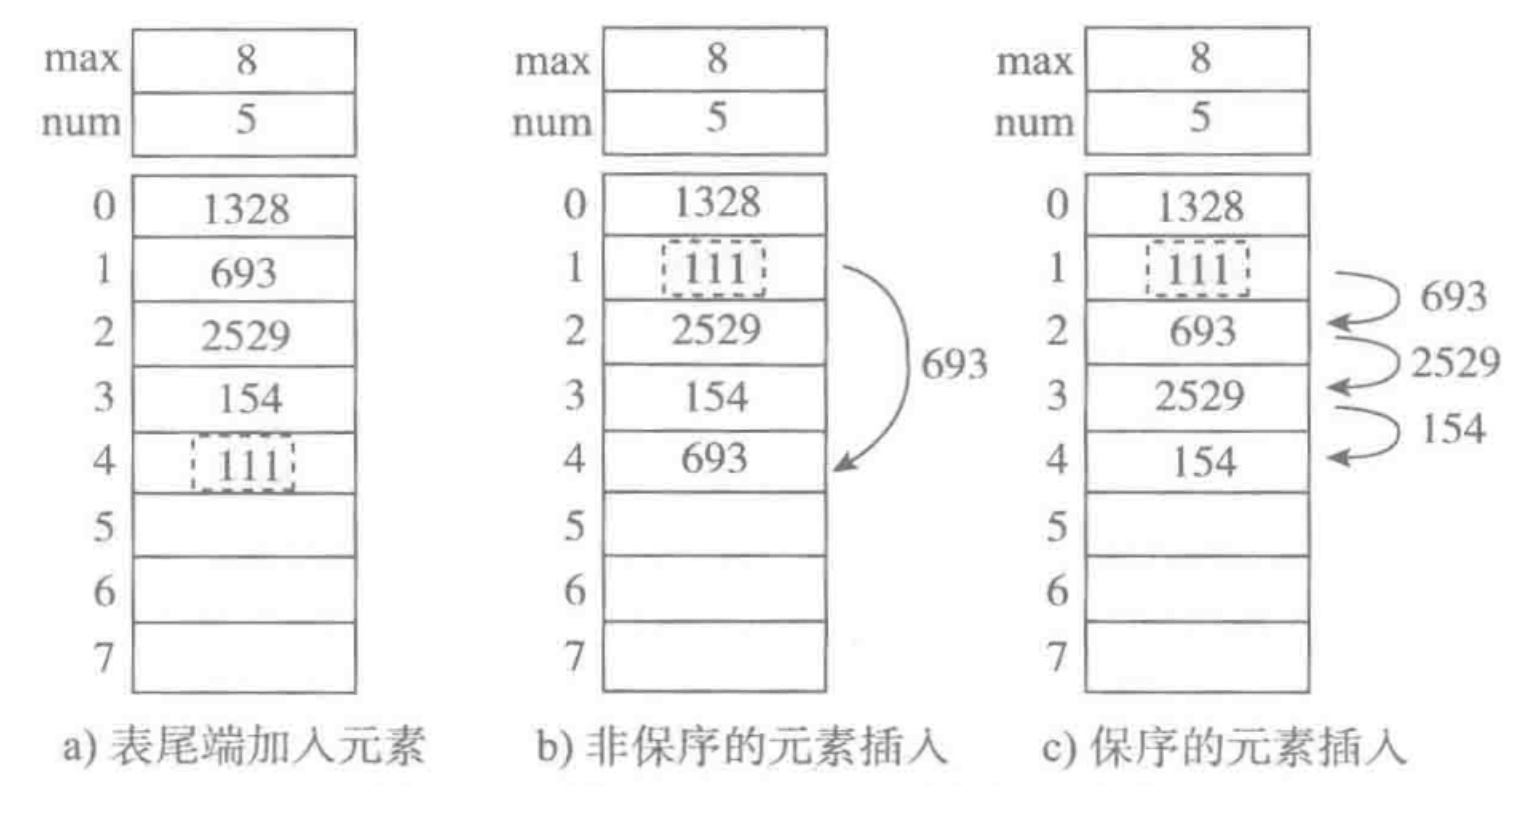
* 尾端加入元素，时间复杂度为O(1)

* 非保序的加入元素（不常见），时间复杂度为O(1)

* 保序的元素加入，时间复杂度为O(n)
#### （2）删除   
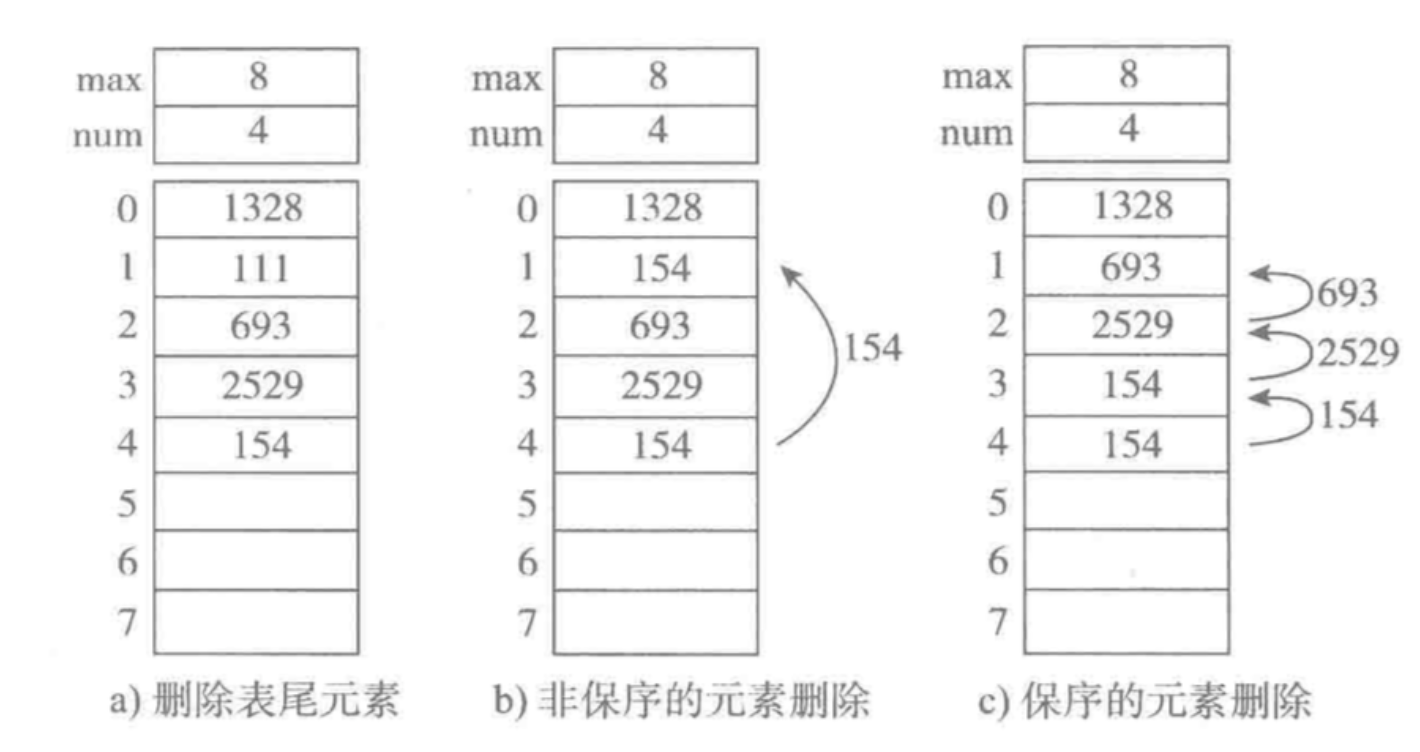   
* 删除表尾元素，时间复杂度为O(1)

* 非保序的元素删除（不常见），时间复杂度为O(1)

* 保序的元素删除，时间复杂度为O(n)

## 4.python中的顺序表

Python中的list和tuple两种类型采用了顺序表的实现技术，tuple是不可变类型，即不变的顺序表，因此不支持改变其内部状态的任何操作，而其他方面，则与list的性质类似。

python的标准list有以下的特征： 
* 顺序表的存储形式，数据存储在一个连续的内存空间中。所以可以实现基于下标（位置）的高效元素访问和更新，时间复杂度应该是O(1)。
* 采用元素外置的存储方式，所以同一个列表中存储不同类型的数据。
* 是一种采用分离式（表头与数据区分开）技术实现的动态顺序表。所以允许任意加入元素，而且在不断加入元素的过程中，表对象的标识（函数id得到的值）不变。
* 存储区的扩充机制，list实现采用了如下的策略：在建立空表（或者很小的表）时，系统分配一块能容纳8个元素的存储区；在执行插入操作（insert或append）时，如果元素存储区满就换一块4倍大的存储区。但如果此时的表已经很大（目前的阀值为50000），则改变策略，采用加一倍的方法。